#  Pandas : Sales Analysis

### Import necessary libraries updated them if needed
> Numpy - Matplotlib - Pandas - Seaborn - Operating System

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Step One: Collect Data 

#### Merge data of each month into one CSV
In the given folder (Sales Data), you will find a group of csv files. Merge them in one data frame, then save them in a separate csv file

In [36]:
import pandas as pd
from pathlib import Path

# create a Path instance and filter for only csv files
files = Path("C:\\Users\\Ayed Ali\\Desktop\\Sales_Data").rglob("*.csv")

# read in all the csv files
all_csvs = [pd.read_csv(file) for file in files]

# lump into one table
df = pd.concat(all_csvs)



### Read the updated dataframe

In [37]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Investigating the Data
Read the itemdescription.txt to understand the given data.

Explore the data and comment on it

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373700 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          372610 non-null  object
 1   Product           372610 non-null  object
 2   Quantity Ordered  372610 non-null  object
 3   Price Each        372610 non-null  object
 4   Order Date        372610 non-null  object
 5   Purchase Address  372610 non-null  object
dtypes: object(6)
memory usage: 20.0+ MB


In [50]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Comment on the Data

In [6]:
#the data contaned null value 
#we need to convert column type
#data contaned duplicated

## Preparing and Cleaning up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

In [39]:
df[df.duplicated()].count()

Order ID            186923
Product             186923
Quantity Ordered    186923
Price Each          186923
Order Date          186923
Purchase Address    186923
dtype: int64

In [40]:
#df=df.drop_duplicates()
#df[df.duplicated()].count()

In [41]:
df.isna().sum()

Order ID            1090
Product             1090
Quantity Ordered    1090
Price Each          1090
Order Date          1090
Purchase Address    1090
dtype: int64

In [42]:
df=df.dropna()
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [47]:
# remove mid headers
df=df[df.Product!='Product']

In [48]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [51]:
df["Order ID"]=df["Order ID"].astype(float)
df["Quantity Ordered"]=df["Quantity Ordered"].astype(float)
df["Price Each"]=df["Price Each"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371900 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          371900 non-null  float64
 1   Product           371900 non-null  object 
 2   Quantity Ordered  371900 non-null  float64
 3   Price Each        371900 non-null  float64
 4   Order Date        371900 non-null  object 
 5   Purchase Address  371900 non-null  object 
dtypes: float64(3), object(3)
memory usage: 19.9+ MB


In [52]:
timefmt = "%m/%d/%y %H:%M" 
df['Order Date']= pd.to_datetime(df['Order Date'], format = timefmt, errors='coerce')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371900 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          371900 non-null  float64       
 1   Product           371900 non-null  object        
 2   Quantity Ordered  371900 non-null  float64       
 3   Price Each        371900 non-null  float64       
 4   Order Date        371900 non-null  datetime64[ns]
 5   Purchase Address  371900 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 19.9+ MB


In [62]:
df['Hour']=df['Order Date'].dt.hour
df['Month']=df['Order Date'].dt.month


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371900 entries, 0 to 11685
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          371900 non-null  float64       
 1   Product           371900 non-null  object        
 2   Quantity Ordered  371900 non-null  float64       
 3   Price Each        371900 non-null  float64       
 4   Order Date        371900 non-null  datetime64[ns]
 5   Purchase Address  371900 non-null  object        
 6   Hour              371900 non-null  int64         
 7   Month             371900 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 25.5+ MB


In [64]:
df.dtypes

Order ID                   float64
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Hour                         int64
Month                        int64
dtype: object

<AxesSubplot:xlabel='Product'>

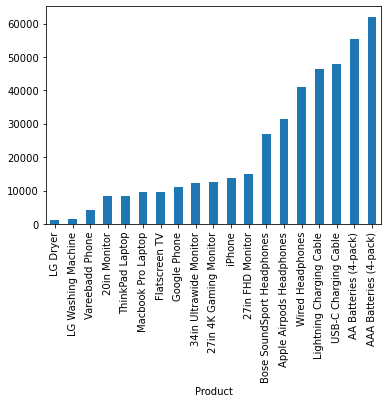

In [60]:
df.groupby(df['Product'])['Quantity Ordered'].sum().sort_values().plot(kind='bar')

In [19]:
# new csv file after clean data
df.to_csv( "all_data.csv", index=False, encoding='utf-8-sig')

## Data Exploration!

In [81]:
df['sales'] = df["Price Each"] * df["Quantity Ordered"]

* Question 1: What was the best month for sales? How much was the total sales in that month? (Analatically and graphically)
* Question 2: Which city have sold the most products?
* Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?
* Question 4: What products are most often sold together? (Bonus)
* Question 5: What product sold the most? Why do you think it sold the most?

> Comment on each result

#### Question 1: What was the best month for sales? How much was earned that month? (Analatically and graphically)
Draw a bar chart that can idicate the month with the higest (in green) and lowest sales (in red)
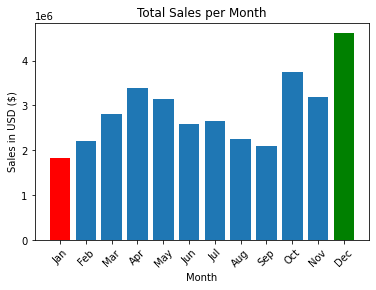

In [22]:
m=df['Month']
x=(df.groupby(m)['sales'].sum().sort_values())

<AxesSubplot:xlabel='Month'>

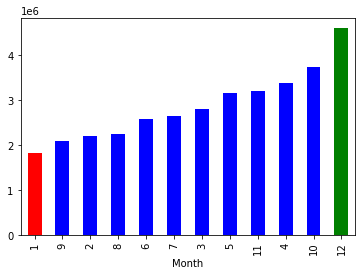

In [23]:
x.plot(kind='bar',color=['r', 'b','b','b','b','b','b','b','b','b','b', 'g'])

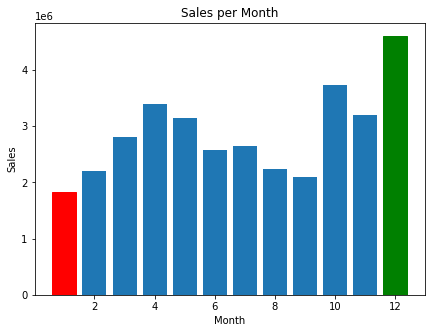

In [24]:
fig,ax = plt.subplots(figsize=(7,5))
barlist = ax.bar(x.index , x.values)
ax.set_xlabel('Month')
ax.set_ylabel('Sales')
ax.set_title('Sales per Month')
barlist[x.idxmin() -1].set_color('r')
barlist[x.idxmax() -1].set_color('g')
plt.show()

In [25]:
print("the max month is December and Quantity_Ordered  = "+str(x.max()))
print("the min month is January  and Quantity_Ordered  = "+str(x.min()))

the max month is December and Quantity_Ordered  = 4608295.700001529
the min month is January  and Quantity_Ordered  = 1821413.1599999145


In [26]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Hour,Month,sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",8,4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",22,4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",14,4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",14,4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",9,4,11.99


#### Question 2: What city sold the most product?

In [79]:
cit = df["Purchase Address"].str.split(",", n = 3, expand = True)
#c=cit[2].str.split(" ")
#df['city'] = cit[1]+" "+c[1]
df['city'] = cit[1]+" "+cit[2]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Hour,Month,city
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",8,4,Dallas TX 75001
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",22,4,Boston MA 02215
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",14,4,Los Angeles CA 90001
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",14,4,Los Angeles CA 90001
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",9,4,Los Angeles CA 90001


<AxesSubplot:xlabel='city'>

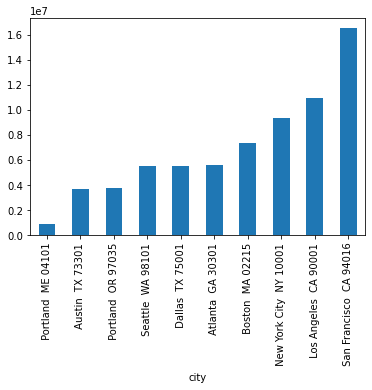

In [82]:
df.groupby(df['city'])['sales'].sum().sort_values().plot(kind='bar')

In [34]:
c=df.groupby(df['city'])['sales'].sum().sort_values()

' San Francisco'

In [35]:
print("the most city is : "+c.index[-1])

the most city is :  San Francisco


#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?
Plot the number of purchase orders done in every hour and mark the higest hour

In [28]:
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase Address
0,141234.0,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


<AxesSubplot:xlabel='Hour'>

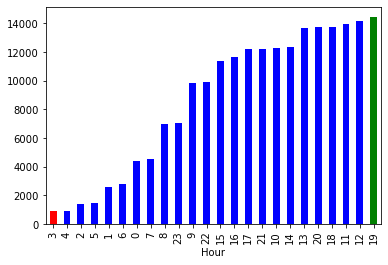

In [80]:
y=df.groupby(df['Hour'])['Quantity Ordered'].sum().sort_values()
y.plot(kind='bar',color=['r', 'b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b', 'g'])





In [83]:
print("time should we display advertisements to maximize likelihood of customer's buying product is : "+str(y.idxmax()))

time should we display advertisements to maximize likelihood of customer's buying product is : 19


#### Question 4: What products are most often sold together?

In [104]:
products = df.groupby(df['Product'])['Quantity Ordered'].sum().sort_values(ascending = False)
products.index[0:5]

Index(['AAA Batteries (4-pack)', 'AA Batteries (4-pack)',
       'USB-C Charging Cable', 'Lightning Charging Cable', 'Wired Headphones'],
      dtype='object', name='Product')

#### Question 5: What product sold the most? Why do you think it sold the most?

In [105]:
print("the product sold most is :  "+products.index[0])

the product sold most is :  AAA Batteries (4-pack)


<AxesSubplot:xlabel='Product'>

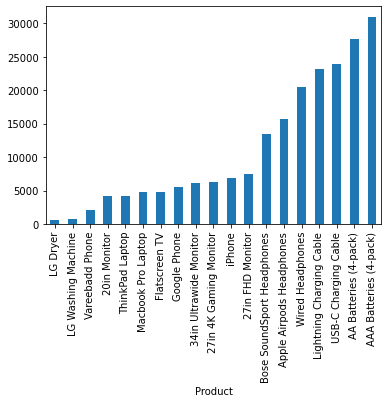

In [94]:
df.groupby(df['Product'])['Quantity Ordered'].sum().sort_values().plot(kind='bar')

In [106]:
import numpy as np
import pandas as pd

dates = np.asarray(pd.date_range('1/1/2000', periods=8))
df1 = pd.DataFrame(np.random.randn(8, 4), index=dates, columns=['A', 'B', 'C', 'D'])
df2 = df1.copy()
df3 = df1.copy()
df = df1.append([df2, df3])

df

,A,B,C,D
2000-01-01,0.513205,-1.369742,1.402238,1.667776
2000-01-02,0.335905,-0.059165,-0.556960,-0.349201
2000-01-03,-1.209260,-1.148471,-2.131594,-1.377348
2000-01-04,2.136401,-0.745482,-0.791620,-2.975816
2000-01-05,0.616377,-0.678978,-0.962272,-0.299518
2000-01-06,0.277803,-1.605965,1.119341,0.814162
2000-01-07,-1.538465,-0.556354,-0.069370,-0.139554
2000-01-08,0.388855,0.705957,0.468108,-0.616220
2000-01-01,0.513205,-1.369742,1.402238,1.667776
2000-01-02,0.335905,-0.059165,-0.556960,-0.349201
